In [1]:
# Guesses N bits in one try while a classical comp would need N tries
# 6 bits -> 64 tries manually, 6 tries with classical comp, 1 try with quantum

In [2]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [3]:
secretnumber = '10110'

In [4]:
#HARDCODED STRAT
#not including all the barriers and other stuff
#circuit = QuantumCircuit(6+1, 6)
#circuit.h([0,1,2,3,4,5])

#for every one in the secret num, put another cx gate
#circuit.cx(5, 6)
#circuit.cx(3, 6)
#circuit.cx(0, 6)

In [5]:
#GENERALIZED STRAT
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
#in python this returns the array 0-n (this case n=5) for this secret number
circuit.h(range(len(secretnumber)))
#returns length, though in these cases it is used to get the last bit 5
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

# if 1 exists on that qbit, apply cx gate on it
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

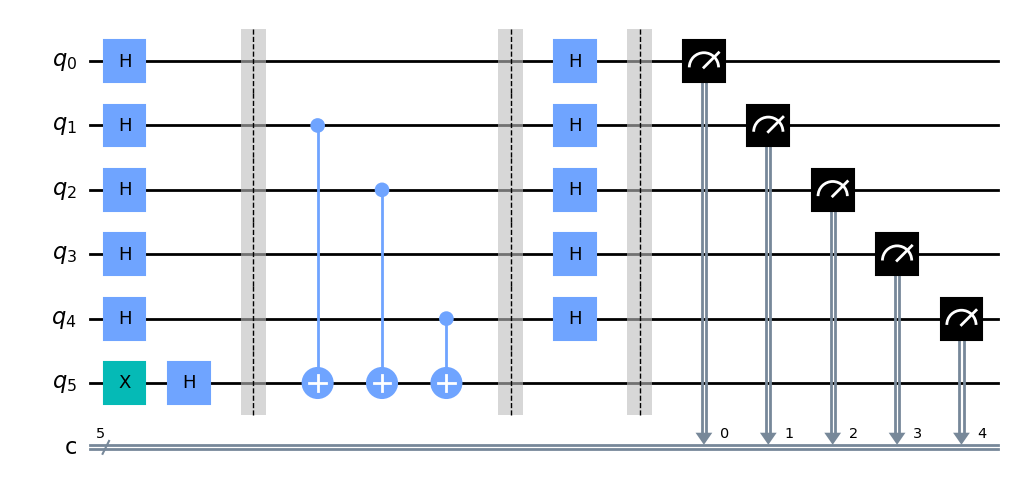

In [6]:
circuit.draw(output='mpl')

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'10110': 1}


In [8]:
#Terra Real Hardware Execution
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibm_oslo')

In [9]:
job = execute(circuit, backend = device, shots = 1024, optimization_level = 0)
print(job.job_id())
job_monitor(job)

6397d613c727c30691613a24
Job Status: job has successfully run


In [1]:
cal_results = cal_job.result()
print(cal_results.get_counts())

NameError: name 'cal_job' is not defined